In [27]:
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
import matplotlib as mpl
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline

In [28]:
import os
import re
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd

In [29]:
monthfile='MERRA2_2017_tavg1_2d_aer_Nx_M2T1NXAER_ctio_06.csv'
yearfile='MERRA2_2017_tavg1_2d_aer_Nx_M2T1NXAER_ctio_AllYear.csv'

In [30]:
df_month=pd.read_csv(monthfile)

In [31]:
df_year=pd.read_csv(yearfile)

In [32]:
df_month.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,720.000000,720.000000,720.000000
mean,1.319992,0.053532,0.050035
std,0.096633,0.021126,0.020643
min,1.028973,0.018895,0.016767
25%,1.264401,0.037872,0.034969
50%,1.322928,0.050067,0.046491
75%,1.383139,0.063408,0.059464
max,1.556037,0.165293,0.159976


In [33]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

In [34]:
exct_aer_month=df_month["TOTEXTTAU"]

In [35]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(exct_aer_month)

In [36]:
print themean_m, thestd_m, thevariation_m

0.053 0.021 39.0


In [37]:
title = "Monthly variation of Aerosols extinctions (jun 2017), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

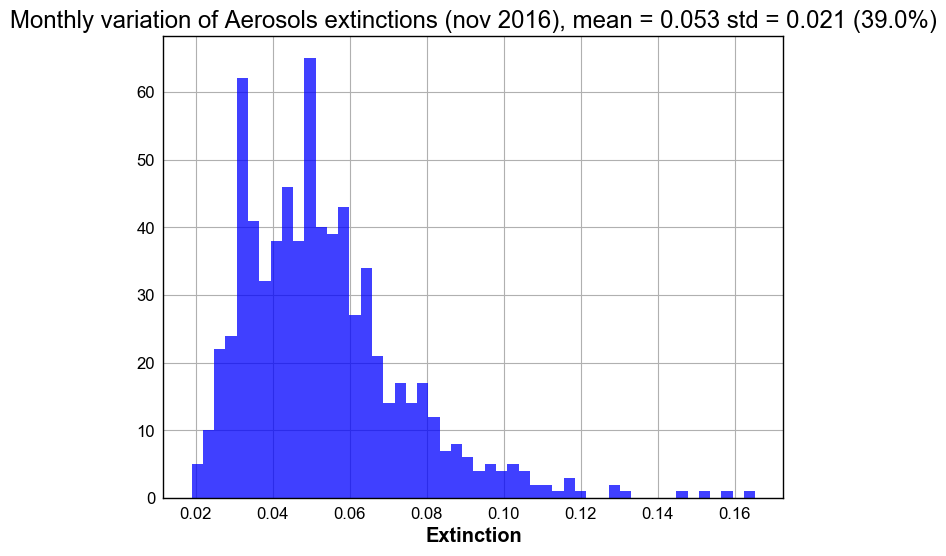

In [38]:
n, bins, patches = plt.hist(exct_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2017_06.pdf')

In [39]:
ang_aer_month=df_month["TOTANGSTR"]

In [40]:
themean_m, thestd_m,thevariation_m= GetMeanAndSigma(ang_aer_month)

In [41]:
print themean_m, thestd_m, thevariation_m

1.319 0.096 7.0


In [42]:
title = "Monthly variation of Angstrom exponent Aerosols (jun 2017), mean = {} std = {} ({}%)".format(themean_m ,thestd_m, thevariation_m)

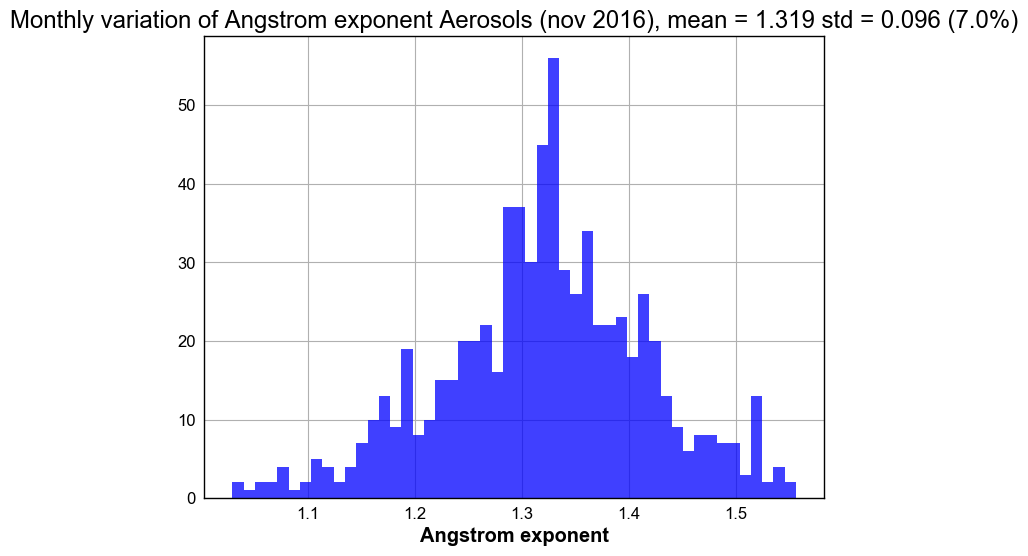

In [43]:
n, bins, patches = plt.hist(ang_aer_month, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2017_06.pdf')

In [44]:
df_year.describe()

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
count,8040.000000,8040.000000,8040.000000
mean,1.401559,0.039881,0.037571
std,0.122406,0.021550,0.021085
min,0.762541,0.007128,0.006281
25%,1.318853,0.025247,0.023443
50%,1.406375,0.034890,0.032612
75%,1.486127,0.049027,0.046177
max,1.831648,0.244926,0.243346


In [45]:
df_year.quantile([0.05,0.1,0.5,0.9,0.95])

,TOTANGSTR,TOTEXTTAU,TOTSCATAU
0.05,1.195794,0.015897,0.014543
0.10,1.244851,0.019012,0.017557
0.50,1.406375,0.034890,0.032612
0.90,1.556802,0.065666,0.062685
0.95,1.594441,0.078874,0.076085


In [46]:
exct_aer_year=df_year["TOTEXTTAU"]

In [47]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(exct_aer_year)

In [48]:
title = "Yearly variation of Aerosols extinctions, mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

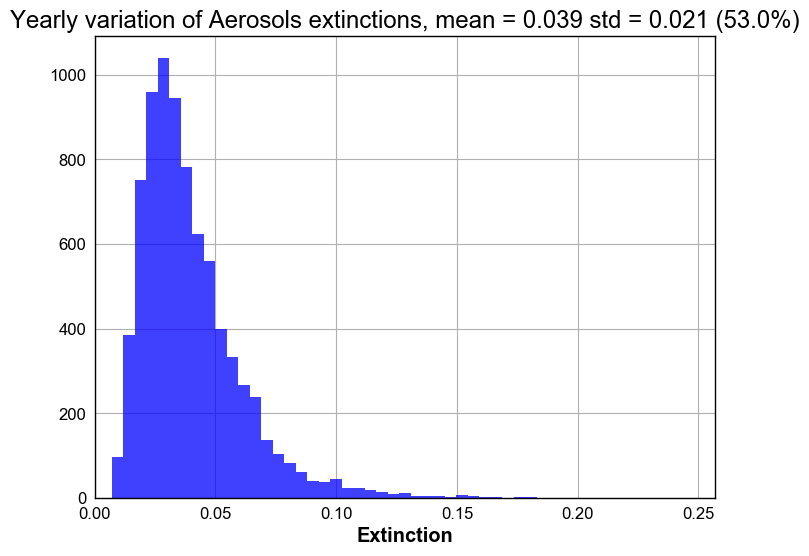

In [49]:
n, bins, patches = plt.hist(exct_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlim(0.,)
plt.xlabel('Extinction')
plt.savefig('HistoAerExt2017_year.pdf')

In [50]:
ang_aer_year=df_year["TOTANGSTR"]

In [51]:
themean_y, thestd_y,thevariation_y= GetMeanAndSigma(ang_aer_year)

In [52]:
title = "Yearly variation of Angstrom exponent Aerosols (2017), mean = {} std = {} ({}%)".format(themean_y ,thestd_y, thevariation_y)

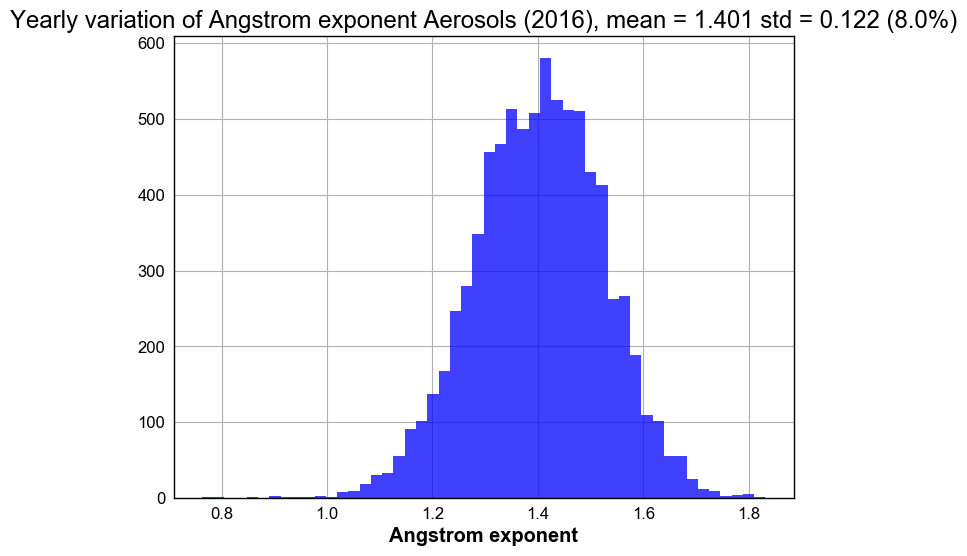

In [53]:
n, bins, patches = plt.hist(ang_aer_year, 50, normed=False, facecolor='blue', alpha=0.75)
plt.title(title)
plt.xlabel('Angstrom exponent')
plt.savefig('HistoAerAng2017_year.pdf')